First we import data for the 2022/23 fixtures in Premier League from the website fbref, which contains a lot of different statistics for the matches played in the season so far. Then we drop some data we don't want, and we reshape some data.

In [231]:
# Import pandas
import pandas as pd

# Import data from fbref via the url
url = 'https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'

# Create an empty list for the data
PL_list = []

# Append dataframe containing data to the empty list, from the url above
PL_list.append(pd.read_html(url,index_col=False,flavor='lxml')[0])
PL_list = pd.concat(PL_list, axis=0, ignore_index=True)

# Rename columns to differentiate expected goals for the home team and expected goals for the away team
EPL_df = PL_list[PL_list.notna()]
EPL_df = EPL_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})

# Extract the score so instead of having the score as eg. 0-2 we get the score to 0 for the home team and 2 for the away team
EPL_df['HomeScore'] = EPL_df['Score'].str[0]
EPL_df['AwayScore'] = EPL_df['Score'].str[2]

# Drop the columns we dont want to include 
EPL_df = EPL_df.drop(['Match Report','Notes'],axis=1)

# Convert to date
EPL_df['Date'] = pd.to_datetime(EPL_df['Date'])

# Sort matches by date 
EPL_df.sort_values(by='Date', inplace=True)

# Extract data in the wanted order
EPL_df = EPL_df[['Wk','Date','Time','Home','HomeScore','Score','xGHome','AwayScore','xGAway','Away']]

In [232]:
EPL_df.dtypes

Wk                  float64
Date         datetime64[ns]
Time                 object
Home                 object
HomeScore            object
Score                object
xGHome              float64
AwayScore            object
xGAway              float64
Away                 object
dtype: object

We then examine our data for the fixtures

In [233]:
# Create a table with the data we want for all the matches played in the season so far 
EPL_df = EPL_df.dropna()
EPL_df = EPL_df[['Date','Home','xGHome','HomeScore','Score','AwayScore','xGAway','Away']].reset_index(drop=True)
EPL_df

,Date,Home,xGHome,HomeScore,Score,AwayScore,xGAway,Away
0,2022-08-05,Crystal Palace,1.2,0,0–2,2,1.0,Arsenal
1,2022-08-06,Fulham,1.2,2,2–2,2,1.2,Liverpool
2,2022-08-06,Tottenham,1.5,4,4–1,1,0.5,Southampton
3,2022-08-06,Newcastle Utd,1.7,2,2–0,0,0.3,Nott'ham Forest
4,2022-08-06,Leeds United,0.8,2,2–1,1,1.3,Wolves
...,...,...,...,...,...,...,...,...
298,2023-04-15,Tottenham,2.0,2,2–3,3,1.3,Bournemouth
299,2023-04-15,Chelsea,0.6,1,1–2,2,2.2,Brighton
300,2023-04-15,Southampton,0.8,0,0–2,2,0.8,Crystal Palace
301,2023-04-15,Aston Villa,1.8,3,3–0,0,0.6,Newcastle Utd


We want to calculate the mean expected goals for the home team and the away team, in the league.

In [234]:
# Calculate the mean expected goals for the home team and the away team
league_Mean_Home_xG = round((EPL_df['xGHome'].mean()),2)
league_Mean_Away_xG = round((EPL_df['xGAway'].mean()),2)
print(f"The mean home expected goals is:", league_Mean_Home_xG)
print(f"The mean away expected goals is:", league_Mean_Away_xG)

The mean home expected goals is: 1.51
The mean away expected goals is: 1.23


We want to check which team has the highest expected goals when playing as the home team

In [235]:
# Creating a table based on expected goals scored when playing at home

home_team_xg_per_match = EPL_df.groupby('Home').agg({'xGHome': 'sum', 'Home': ['count', 'first']})
home_team_xg_per_match.columns = ['xG_Home_Scored', 'TotalGames', 'Home']
home_team_xg_per_match['xGHome_per_match'] = round((home_team_xg_per_match['xG_Home_Scored'] / home_team_xg_per_match['TotalGames']), 3)
home_team_xg_per_match = home_team_xg_per_match.reset_index(drop = True)
home_team_xg_per_match = pd.DataFrame(home_team_xg_per_match)
home_team_xg_per_match.columns = ['xG_Home_Scored', 'TotalGames','Home','home_team_xg_per_match']
home_team_xg_per_match = home_team_xg_per_match[['Home','xG_Home_Scored','TotalGames','home_team_xg_per_match']]
home_team_xg_per_match.sort_values('home_team_xg_per_match', ascending=False)


,Home,xG_Home_Scored,TotalGames,home_team_xg_per_match
0,Arsenal,34.7,15,2.313
12,Manchester City,34.0,15,2.267
11,Liverpool,30.9,14,2.207
14,Newcastle Utd,28.5,14,2.036
4,Brighton,27.3,14,1.950
13,Manchester Utd,28.3,15,1.887
3,Brentford,24.3,15,1.620
17,Tottenham,25.9,16,1.619
1,Aston Villa,24.2,16,1.512
5,Chelsea,22.9,16,1.431


We want to check which team has the highest expected goals when playing as the away team

In [236]:
# Creating a table based on expected goals scored when playing away

Away_team_xg_per_match = EPL_df.groupby('Away').agg({'xGAway': 'sum', 'Away': ['count', 'first']})
Away_team_xg_per_match.columns = ['xG_Away_Scored', 'TotalGames', 'Away']
Away_team_xg_per_match['xGAway_per_match'] = round((Away_team_xg_per_match['xG_Away_Scored'] / Away_team_xg_per_match['TotalGames']), 3) 
Away_team_xg_per_match = Away_team_xg_per_match.reset_index(drop = True)
Away_team_xg_per_match = pd.DataFrame(Away_team_xg_per_match)
Away_team_xg_per_match.columns = ['xG_Away_Scored', 'TotalGames','Away','Away_team_xg_per_match']
Away_team_xg_per_match = Away_team_xg_per_match[['Away','xG_Away_Scored','TotalGames','Away_team_xg_per_match']]
Away_team_xg_per_match.sort_values('Away_team_xg_per_match', ascending=False)

,Away,xG_Away_Scored,TotalGames,Away_team_xg_per_match
12,Manchester City,29.4,15,1.960
4,Brighton,25.9,15,1.727
0,Arsenal,24.0,15,1.600
10,Leicester City,24.0,16,1.500
11,Liverpool,21.1,15,1.407
14,Newcastle Utd,22.2,16,1.388
3,Brentford,21.1,16,1.319
17,Tottenham,19.4,15,1.293
9,Leeds United,18.6,15,1.240
13,Manchester Utd,17.2,14,1.229


We want to check which team has the highest expected goals against them when playing as the home team

In [94]:
# Creating a table based on expected goals conceded when playing at home

home_team_xg_conceded_per_match = EPL_df.groupby('Home').agg({'xGAway': 'sum', 'Home': ['count', 'first']})
home_team_xg_conceded_per_match.columns = ['Home_xG_Conceded', 'TotalGames', 'Home']
home_team_xg_conceded_per_match['Home_xG_Conceded_per_match_Home'] = round((home_team_xg_conceded_per_match['Home_xG_Conceded'] / home_team_xg_conceded_per_match['TotalGames']), 3)
home_team_xg_conceded_per_match = home_team_xg_conceded_per_match.reset_index(drop = True)
home_team_xg_conceded_per_match = pd.DataFrame(home_team_xg_conceded_per_match)
home_team_xg_conceded_per_match.columns = ['Home_xG_Conceded', 'TotalGames','Home', 'Home_xG_Conceded_per_match_Home']
home_team_xg_conceded_per_match = home_team_xg_conceded_per_match[['Home', 'Home_xG_Conceded', 'TotalGames', 'Home_xG_Conceded_per_match_Home']]
home_team_xg_conceded_per_match.sort_values('Home_xG_Conceded_per_match_Home', ascending=True)


,Home,Home_xG_Conceded,TotalGames,Home_xG_Conceded_per_match_Home
12,Manchester City,10.5,15,0.700
14,Newcastle Utd,12.1,14,0.864
13,Manchester Utd,14.7,15,0.980
0,Arsenal,15.0,15,1.000
17,Tottenham,16.8,16,1.050
11,Liverpool,15.0,14,1.071
4,Brighton,15.5,14,1.107
5,Chelsea,18.7,16,1.169
18,West Ham,17.8,15,1.187
3,Brentford,18.1,15,1.207


We want to check which team has the highest expected goals against them when playing as the away team

In [95]:
# Creating a table based on expected goals conceded when playing away

Away_team_xg_conceded_per_match = EPL_df.groupby('Away').agg({'xGHome': 'sum', 'Away': ['count', 'first']})
Away_team_xg_conceded_per_match.columns = ['Away_xG_Conceded', 'TotalGames', 'Away']
Away_team_xg_conceded_per_match['xGConceded_per_match'] = round((Away_team_xg_conceded_per_match['Away_xG_Conceded'] / Away_team_xg_conceded_per_match['TotalGames']), 3) 
Away_team_xg_conceded_per_match = Away_team_xg_conceded_per_match.reset_index(drop = True)
Away_team_xg_conceded_per_match = pd.DataFrame(Away_team_xg_conceded_per_match)
Away_team_xg_conceded_per_match.columns = ['Away_xG_Conceded', 'TotalGames','Away','Away_team_xg_conceded_per_match']
Away_team_xg_conceded_per_match = Away_team_xg_conceded_per_match[['Away','Away_xG_Conceded','TotalGames','Away_team_xg_conceded_per_match']]
Away_team_xg_conceded_per_match.sort_values('Away_team_xg_conceded_per_match', ascending=True)


,Away,Away_xG_Conceded,TotalGames,Away_team_xg_conceded_per_match
12,Manchester City,14.0,15,0.933
0,Arsenal,16.7,15,1.113
14,Newcastle Utd,18.8,16,1.175
4,Brighton,17.9,15,1.193
18,West Ham,17.8,14,1.271
6,Crystal Palace,20.9,16,1.306
5,Chelsea,19.7,15,1.313
16,Southampton,20.1,15,1.340
17,Tottenham,20.4,15,1.360
3,Brentford,22.8,16,1.425


# Now we focuse on the match played sunday 09/04/23 between Liverpool - Arsenal, to try and see if we by the data above can predict the correct result in the match

In [96]:
# Calculate the expected goals scored by Liverpool based on expected goals scored by Liverpool at home multiplied by expected goals conceded by Arsenal away

Liverpool_xG_Home_Scored = 2.207
Arsenal_Away_xG_Conceded = 1.113

Liverpool_home_expected_xg = (Liverpool_xG_Home_Scored * Arsenal_Away_xG_Conceded) 

Liverpool_home_expected_xg

2.456391

In [97]:
# Calculate the expected goals scored by Arsenal based on expected goals scored by Arsenal away multiplied by expected goals conceded by Liverpool at home

Arsenal_xG_Away_Scored = 1.600
Liverpool_Home_xG_Conceded = 1.071

Arsenal_away_expected_xg = Arsenal_xG_Away_Scored * Liverpool_Home_xG_Conceded

Arsenal_away_expected_xg

1.7136

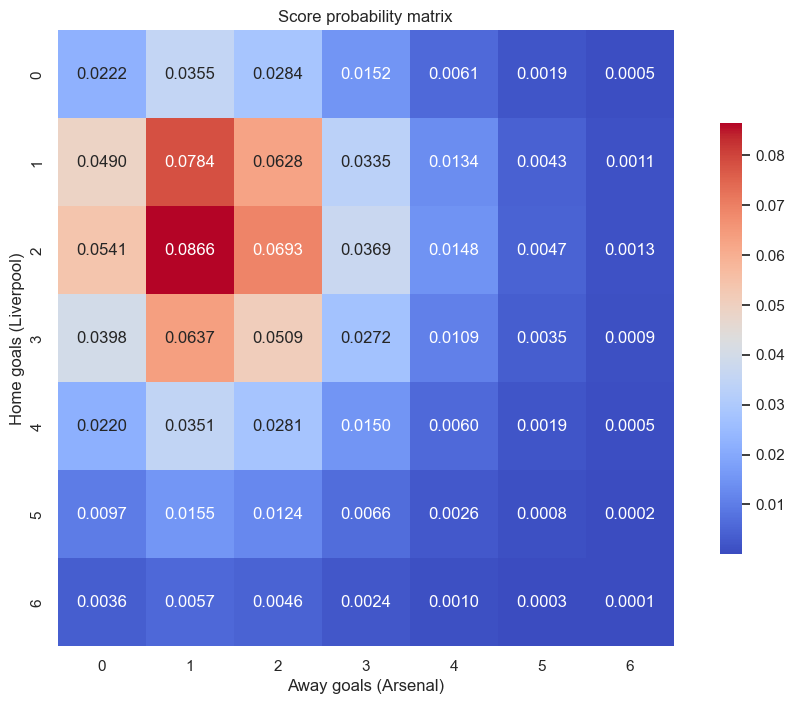

In [242]:
# Import packages 
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

# We set the maximum amount of goals a team can score in the match. This is based on what gives the most intuitive result in the matrix below
max_score = 6
score_range = np.arange(0, max_score+1)

# Use the Poisson distribution to get the probability of each possible score in the match
home_pmf = poisson.pmf(score_range, Liverpool_xG_Home_Scored)
away_pmf = poisson.pmf(score_range, Arsenal_xG_Away_Scored)

# Calculate the outer product of the home and away PMFs
score_prob_matrix = np.outer(home_pmf, away_pmf)

# Reshape the matrix into a square matrix of score probabilities
score_prob_matrix = score_prob_matrix.reshape(max_score+1, max_score+1)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Create a heatmap with probabilities
sns.set()
sns.heatmap(score_prob_matrix, cmap="coolwarm", annot=True, fmt=".4f", square=True, cbar_kws={"shrink": 0.7}, ax=ax)

# Set the axis labels and title
plt.xlabel("Away goals (Arsenal)")
plt.ylabel("Home goals (Liverpool)")
plt.title("Score probability matrix")

# Display the plot
plt.show()

We want to sum up the probabilities of the three outcomes in a match: Home win, draw, Away win

In [285]:
import tabulate

# Calculate the sum of home wins, draws, and away wins from the matrix above
home_wins = np.sum(np.tril(score_prob_matrix, -1))
draws = np.sum(np.diag(score_prob_matrix))
away_wins = np.sum(np.triu(score_prob_matrix, 1))

# Create a table showing the probabilities of outcomes
table_data = [
    ["Home wins", "{:.2%}".format(home_wins)],
    ["Draws", "{:.2%}".format(draws)],
    ["Away wins", "{:.2%}".format(away_wins)]
]
headers = ["Outcome", "Probability"]
table = tabulate.tabulate(table_data, headers=headers, tablefmt="pretty")

# Display the table
print(table)

# Checking if the probabilities approximately sum to 1 (100%)
total_prob = home_wins + draws + away_wins
print(f"The sum of probabilities is: {total_prob:.2%}")


+-----------+-------------+
|  Outcome  | Probability |
+-----------+-------------+
| Home wins |   55.87%    |
|   Draws   |   19.65%    |
| Away wins |   23.44%    |
+-----------+-------------+
The sum of probabilities is: 98.96%


The sum of probabilities doesn't sum to 100% as we have set the maximum amount of goals to 6, setting the maximum amount of goals per team higher, will increase the sum of probabilities, but will make the figure less intuitive to intrepret.

# Compares out model with odds before the match

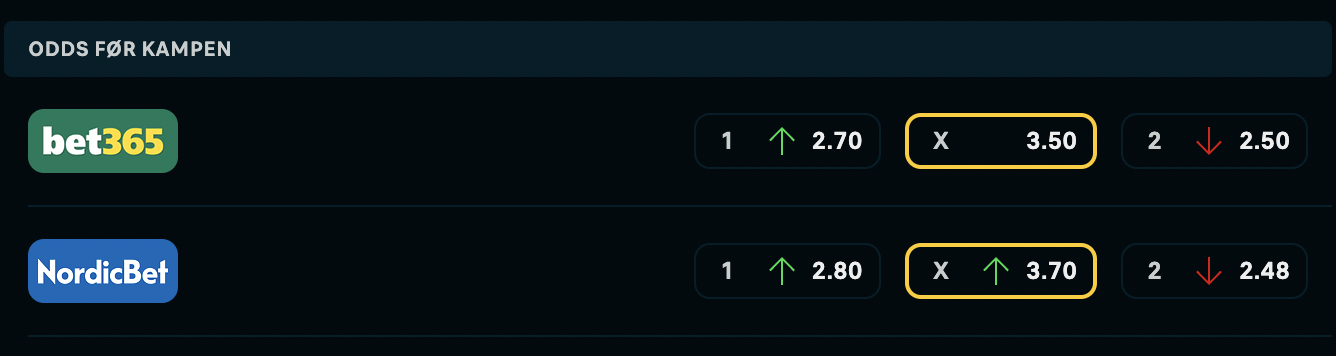

# This equals the following probabilities for a given outcome (Based on the odds from Bet365)

Odds 2.7 = 37,04%

Odds 3.5 = 28,57%

Odds 2.5 = 40,00%



In [284]:

import tabulate

# Create a table showing the probabilities based on the odds
odds_data = [
    ["2.7", "37,04%"],
    ["3.5", "28,57%"],
    ["2.5", "40,00%"]
]
headers = ["Odds", "Probability"]
odds_table = tabulate.tabulate(odds_data, headers=headers, tablefmt="pretty")

# Display the table
print(odds_table)

+------+-------------+
| Odds | Probability |
+------+-------------+
| 2.7  |   37,04%    |
| 3.5  |   28,57%    |
| 2.5  |   40,00%    |
+------+-------------+


# Compares the probabilities from our model to the probabilities based on the odds from Bet365

In [101]:
# Compare our model with the odds
# Create a table showing the probabilities of outcomes
table_data = [
    ["Home wins", "{:.2%}".format(home_wins), "37,04%"],
    ["Draws", "{:.2%}".format(draws), "28,57%"],
    ["Away wins", "{:.2%}".format(away_wins), "40,00%"]
]
headers = ["Outcome", "Our model", "Odds"]
table = tabulate.tabulate(table_data, headers=headers, tablefmt="pretty")

# Display the table
print(table)

+-----------+-----------+--------+
|  Outcome  | Our model |  Odds  |
+-----------+-----------+--------+
| Home wins |  50.87%   | 37,04% |
|   Draws   |  20.40%   | 28,57% |
| Away wins |  27.83%   | 40,00% |
+-----------+-----------+--------+


The table above shows that our model predicts a higher probability of Liverpool winning the match, compared to the odds from Bet365. This shows that our model has some flaws. Our model is very simple and only takes expected goals for and against as inputs, and doesn't include a lot of different important factors as current form, injuries to key players, local derbies etc. The odds is also based on what the customers believe about the match, and can therefore be adjusted to the odds at initial offering, which reflects the probabilities from Bet365's model.

# Predicting the result of Manchester City - Leicester before the match is played 

In [108]:
# Calculate the expected goals scored by Man City based on expected goals scored by Man City at home multiplied by expected goals conceded by Leicester away

Man_City_xG_Home_Scored = 2.314
Leicester_Away_xG_Conceded = 2.007

Man_City_home_expected_xg = (Man_City_xG_Home_Scored * Leicester_Away_xG_Conceded) 

Man_City_home_expected_xg

4.644198

In [109]:
# Calculate the expected goals scored by Arsenal based on expected goals scored by Arsenal away multiplied by expected goals conceded by Liverpool at home

Leicester_xG_Away_Scored = 1.453
Man_City_Home_xG_Conceded = 0.593

Leicester_away_expected_xg = Leicester_xG_Away_Scored * Man_City_Home_xG_Conceded

Leicester_away_expected_xg

0.861629

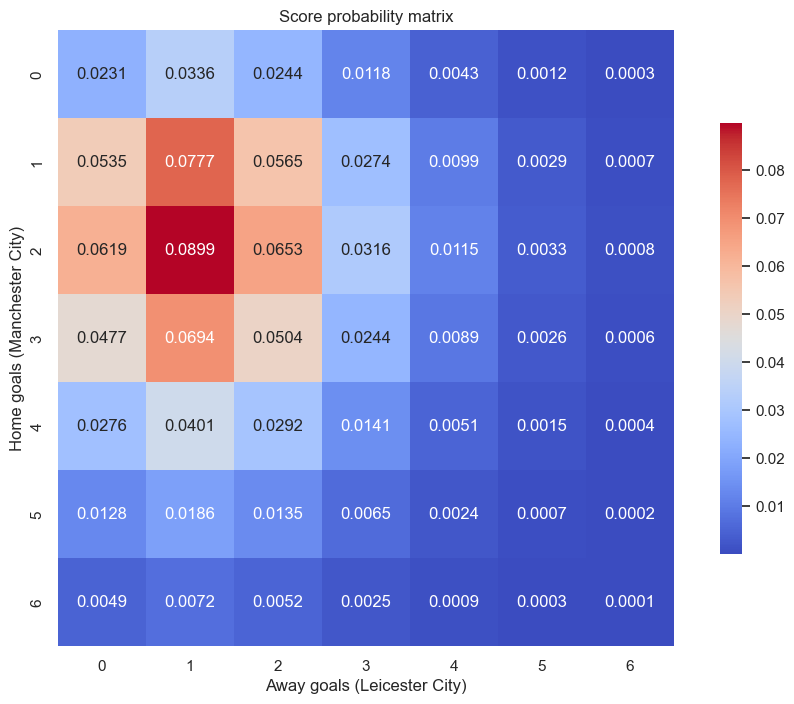

In [245]:

# We set the maximum amount of goals a team can score in the match. This is based on what gives the most intuitive result in the matrix below
max_score = 6
score_range = np.arange(0, max_score+1)

# Use the Poisson distribution to get the probability of each possible score in the match
home_pmf2 = poisson.pmf(score_range, Man_City_xG_Home_Scored)
away_pmf2 = poisson.pmf(score_range, Leicester_xG_Away_Scored)

# Calculate the outer product of the home and away PMFs
score_prob_matrix = np.outer(home_pmf2, away_pmf2)

# Reshape the matrix into a square matrix of score probabilities
score_prob_matrix = score_prob_matrix.reshape(max_score+1, max_score+1)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Create a heatmap with probabilities
sns.set()
sns.heatmap(score_prob_matrix, cmap="coolwarm", annot=True, fmt=".4f", square=True, cbar_kws={"shrink": 0.7}, ax=ax)

# Set the axis labels and title
plt.xlabel("Away goals (Leicester City)")
plt.ylabel("Home goals (Manchester City)")
plt.title("Score probability matrix")

# Display the plot
plt.show()

In [111]:
# Calculate the sums of home wins, draws, and away wins from the matrix above
home_wins = np.sum(np.tril(score_prob_matrix, -1))
draws = np.sum(np.diag(score_prob_matrix))
away_wins = np.sum(np.triu(score_prob_matrix, 1))

# Create a table showing the probabilities of outcomes
table_data = [
    ["Home wins", "{:.2%}".format(home_wins)],
    ["Draws", "{:.2%}".format(draws)],
    ["Away wins", "{:.2%}".format(away_wins)]
]
headers = ["Outcome", "Probability"]
table = tabulate.tabulate(table_data, headers=headers, tablefmt="pretty")

# Display the table
print(table)

# Checking if the probabilities approximately sum to 1 (100%)
total_prob = home_wins + draws + away_wins
print(f"The sum of probabilities is: {total_prob:.2%}")


+-----------+-------------+
|  Outcome  | Probability |
+-----------+-------------+
| Home wins |   55.87%    |
|   Draws   |   19.65%    |
| Away wins |   23.44%    |
+-----------+-------------+
The sum of probabilities is: 98.96%


The sum of probabilities doesn't sum to 100% as we have set the maximum amount of goals to 6, setting the maximum amount of goals per team higher, will increase the sum of probabilities, but will make the figure less intuitive to intrepret.

The match ended 3-1, and therefore the model predicted the result somewhere near the actual result. But it probably wouldn't need a statistical model to predict that Manchester City would win the match, 

# New model

In this more advanced model we use logistic regression to predict the probability of the home team winning for each match based on the expected goals of each team. Then, we uses the Poisson distribution to predict the number of goals each team would score in each match. The probabilities of each team scoring 0-5 goals are calculated and added to the dataframe. the predicted results, probabilities, and scores are printed for each match.

In [391]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy.stats import poisson
#np.random.seed(24)

# Data we want to build our model upon
train_df = EPL_df[:-200]

# Separate the features and target variable
X_train = train_df[['xGHome', 'xGAway']]
y_train = train_df['HomeScore'] > train_df['AwayScore']

# Train a logistic regression model
model = LogisticRegression(random_state=0).fit(X_train, y_train)

# Create a dataframe with the upcoming matches we want to predict
upcoming_matches = pd.DataFrame({
    'Date': ['2023-04-16', '2023-04-15', '2023-04-17'],
    'Home': ['West Ham', 'Manchester City', 'Leeds'],
    'Away': ['Arsenal', 'Leicester', 'Liverpool'],
    'xGHome': [1.427, 2.314, 1.260],
    'xGAway': [1.600, 1.453, 1.407]
})

# Use the trained model to predict the probability of the home team winning for each match
probabilities = model.predict_proba(upcoming_matches[['xGHome', 'xGAway']])

# Add the probabilities and predicted outcomes to the upcoming matches dataframe
upcoming_matches['HomeWinProbability'] = probabilities[:, 1]
upcoming_matches['AwayWinProbability'] = probabilities[:, 0]
upcoming_matches['PredictedWinner'] = upcoming_matches.apply(lambda row: row['Home'] if row['HomeWinProbability'] >= 0.5 else row['Away'], axis=1)

# Predict the number of goals each team would score in each match using Poisson distribution
upcoming_matches['HomeGoals'] = upcoming_matches['xGHome'].apply(lambda x: poisson.rvs(mu=x))
upcoming_matches['AwayGoals'] = upcoming_matches['xGAway'].apply(lambda x: poisson.rvs(mu=x))

# Create a dataframe with the probabilities of each team scoring 0-5 goals
goals_df = pd.DataFrame({'Goals': range(6)})
for i, row in upcoming_matches.iterrows():
    home_probabilities = poisson.pmf(goals_df['Goals'], row['xGHome'])
    away_probabilities = poisson.pmf(goals_df['Goals'], row['xGAway'])
    home_goal_probs = [round(p, 3) for p in home_probabilities]
    away_goal_probs = [round(p, 3) for p in away_probabilities]
    upcoming_matches.at[i, 'HomeProb'] = str(home_goal_probs)
    upcoming_matches.at[i, 'AwayProb'] = str(away_goal_probs)

# Determine the predicted results for each match
upcoming_matches['PredictedResult'] = upcoming_matches.apply(lambda row: 'Home Win' if row['HomeWinProbability'] > row['AwayWinProbability'] else 'Away Win' if row['HomeGoals'] < row['AwayGoals'] else 'Draw', axis=1)

# Sort the matches by the predicted probability of the home team winning
upcoming_matches.sort_values(by='HomeWinProbability', ascending=False, inplace=True)

# Print the dataframe with the predicted outcomes, probabilities, and scores
print(upcoming_matches[['Date', 'Home', 'Away', 'PredictedResult', 'HomeWinProbability', 'AwayWinProbability', 'PredictedWinner', 'HomeGoals', 'AwayGoals']])

         Date             Home       Away PredictedResult  HomeWinProbability  \
1  2023-04-15  Manchester City  Leicester        Home Win            0.751440   
0  2023-04-16         West Ham    Arsenal        Away Win            0.454520   
2  2023-04-17            Leeds  Liverpool            Draw            0.411502   

   AwayWinProbability  PredictedWinner  HomeGoals  AwayGoals  
1            0.248560  Manchester City          2          1  
0            0.545480          Arsenal          1          2  
2            0.588498        Liverpool          2          1  


The purpose of this code was to predict the result of upcoming matches from statistics based on the matches they have already played. Due to the poisson distribution, everytime we run the code it draws new random matches, so every time we run the code, it estimates new match results, meaning it predicts the match results with new probabilities every time the code is run, which is not the intended behavior. This can be solved by setting a seed, and thereby drawing the same matches to base the statistics upon, but this means that we can have a match with Man City and Leicester, where the predicted result is based on matches played by other teams, which is cleatly not what is intended. Unfortunately, we have not been able to solve the problem, but the aim of the model was to predict the result of future matches, based on statistics from both of the teams' earlier played matches. 

Also we can see something is wrong in the output, as the PredictedResult and the PredictedWinner is not equal, and is also not corresponding to the score from HomeGoals and AwayScore.

# Alternative approach

In [351]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(EPL_df[['xGHome', 'xGAway']], EPL_df['Score'], test_size=0.9, random_state=10)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=10)
model.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

# Use the trained model to predict the outcome of new matches
upcoming_matches = pd.DataFrame({
    'Date': ['2023-04-16', '2023-04-15', '2023-04-17'],
    'Home': ['West Ham', 'Manchester City', 'Leeds'],
    'Away': ['Arsenal', 'Leicester', 'Liverpool'],
    'xGHome': [1.427, 2.314, 1.260],
    'xGAway': [1.600, 1.453, 1.407]
})
predictions = model.predict(upcoming_matches[['xGHome', 'xGAway']])
upcoming_matches['PredictedResult'] = predictions

# Print
print("\nUpcoming Matches:\n", upcoming_matches[['Date', 'Home', 'Away', 'PredictedResult']])


Model accuracy: 0.10

Upcoming Matches:
          Date             Home       Away PredictedResult
0  2023-04-16         West Ham    Arsenal             0–2
1  2023-04-15  Manchester City  Leicester             3–1
2  2023-04-17            Leeds  Liverpool             1–2
